In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


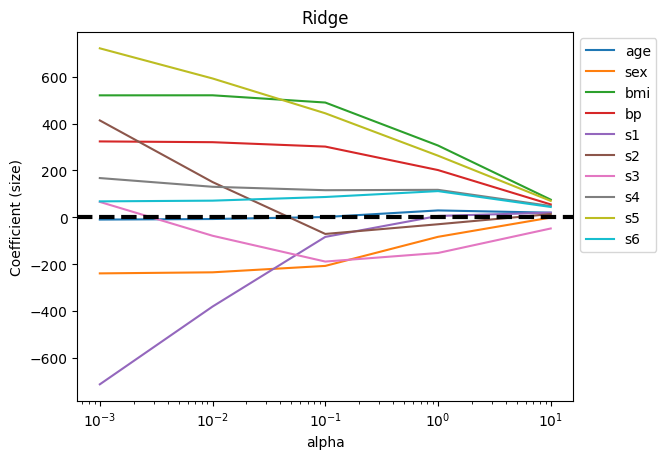

In [9]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, label=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='k', linewidth=3)
plt.show()

# Lasso

In [20]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [21]:
data

[0     -8.998449
 1   -238.899740
 2    520.261362
 3    323.429484
 4   -720.251734
 5    421.405141
 6     66.734168
 7    164.448873
 8    725.340440
 9     67.475538
 dtype: float64,
 0     -1.306575
 1   -228.822331
 2    525.560658
 3    316.175320
 4   -307.013677
 5     89.321688
 6   -105.081398
 7    119.597989
 8    571.330871
 9     65.007316
 dtype: float64,
 0     -0.000000
 1   -155.362882
 2    517.182017
 3    275.082351
 4    -52.540269
 5     -0.000000
 6   -210.159753
 7      0.000000
 8    483.914409
 9     33.672821
 dtype: float64,
 0      0.000000
 1     -0.000000
 2    367.701852
 3      6.301904
 4      0.000000
 5      0.000000
 6     -0.000000
 7      0.000000
 8    307.605700
 9      0.000000
 dtype: float64,
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6   -0.0
 7    0.0
 8    0.0
 9    0.0
 dtype: float64]

# Elastic net

In [16]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [22]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)
data = []

for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5, random_state=45)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [18]:
ela.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

In [19]:
data

[0      8.705295
 1   -178.076275
 2    450.881224
 3    281.072686
 4    -44.049984
 5    -77.944846
 6   -188.958313
 7    119.794742
 8    393.703478
 9     98.943695
 dtype: float64,
 0     33.147202
 1    -35.245609
 2    211.023930
 3    144.560115
 4     21.931533
 5      0.000000
 6   -115.620017
 7    100.658838
 8    185.326334
 9     96.257214
 dtype: float64,
 0    10.286327
 1     0.285976
 2    37.464643
 3    27.544899
 4    11.108850
 5     8.355884
 6   -24.120808
 7    25.505488
 8    35.465757
 9    22.894981
 dtype: float64,
 0    0.359018
 1    0.000000
 2    3.259767
 3    2.204356
 4    0.528646
 5    0.250935
 6   -1.861363
 7    2.114454
 8    3.105841
 9    1.769851
 dtype: float64,
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6   -0.0
 7    0.0
 8    0.0
 9    0.0
 dtype: float64]